In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("StudentPerformanceFactors.csv")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.shape

(6607, 20)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df['Parental_Involvement'].value_counts()

Medium    3362
High      1908
Low       1337
Name: Parental_Involvement, dtype: int64

In [9]:
df['Access_to_Resources'].value_counts()

Medium    3319
High      1975
Low       1313
Name: Access_to_Resources, dtype: int64

In [10]:
df['Extracurricular_Activities'].value_counts()

Yes    3938
No     2669
Name: Extracurricular_Activities, dtype: int64

In [11]:
df['School_Type'].value_counts()

Public     4598
Private    2009
Name: School_Type, dtype: int64

In [12]:
df['Learning_Disabilities'].value_counts()

No     5912
Yes     695
Name: Learning_Disabilities, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      3814
Female    2793
Name: Gender, dtype: int64

In [14]:
df['Sleep_Hours'].value_counts()

7     1741
8     1399
6     1376
9      775
5      695
10     312
4      309
Name: Sleep_Hours, dtype: int64

In [15]:
df['Physical_Activity'].value_counts()

3    2545
2    1627
4    1575
1     421
5     361
0      46
6      32
Name: Physical_Activity, dtype: int64

In [16]:
numerical_data = df[['Hours_Studied','Attendance','Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score']]

In [17]:
numerical_data.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.009908,0.010977,0.024846,-0.014282,0.004624,0.445455
Attendance,-0.009908,1.000000,-0.015918,-0.020186,0.014324,-0.022435,0.581072
Sleep_Hours,0.010977,-0.015918,1.000000,-0.021750,-0.012216,-0.000378,-0.017022
Previous_Scores,0.024846,-0.020186,-0.021750,1.000000,-0.013122,-0.011274,0.175079
Tutoring_Sessions,-0.014282,0.014324,-0.012216,-0.013122,1.000000,0.017733,0.156525
Physical_Activity,0.004624,-0.022435,-0.000378,-0.011274,0.017733,1.000000,0.027824
Exam_Score,0.445455,0.581072,-0.017022,0.175079,0.156525,0.027824,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

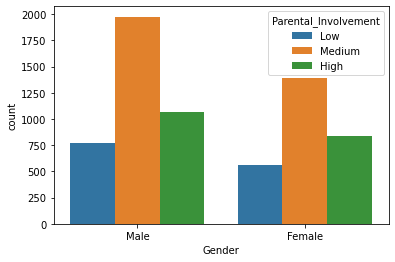

In [18]:
sns.countplot(x='Gender', hue='Parental_Involvement', data=df)

<AxesSubplot:xlabel='Access_to_Resources', ylabel='count'>

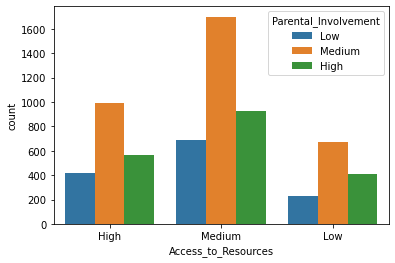

In [19]:
sns.countplot(x='Access_to_Resources', hue='Parental_Involvement', data=df)

<AxesSubplot:xlabel='School_Type', ylabel='count'>

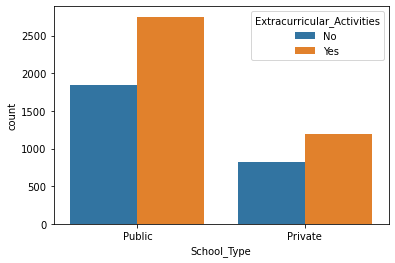

In [20]:
sns.countplot(x='School_Type', hue='Extracurricular_Activities', data=df)

<BarContainer object of 6607 artists>

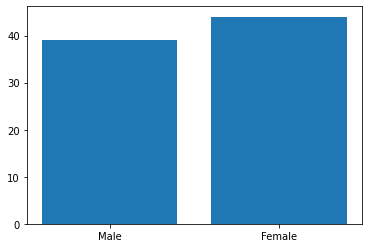

In [21]:
import matplotlib.pyplot as plt
plt.bar(df['Gender'],df['Hours_Studied'])

<BarContainer object of 6607 artists>

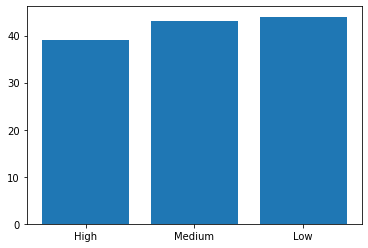

In [22]:
plt.bar(df['Access_to_Resources'],df['Hours_Studied'])

<BarContainer object of 6607 artists>

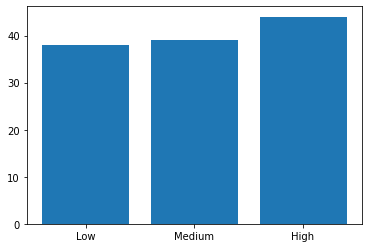

In [23]:
plt.bar(df['Parental_Involvement'],df['Hours_Studied'])

<BarContainer object of 6607 artists>

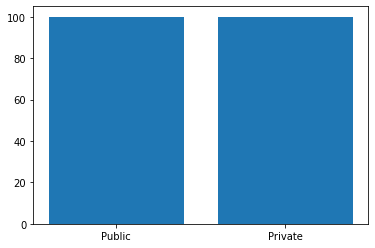

In [24]:
plt.bar(df['School_Type'],df['Previous_Scores'])

<BarContainer object of 6607 artists>

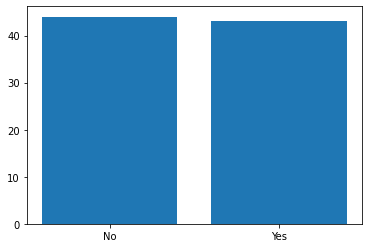

In [25]:
plt.bar(df['Extracurricular_Activities'],df['Hours_Studied'])

{'whiskers': [<matplotlib.lines.Line2D at 0x203cb48d220>,
 'caps': [<matplotlib.lines.Line2D at 0x203cb48d880>,
 'boxes': [<matplotlib.lines.Line2D at 0x203cb477e80>],
 'medians': [<matplotlib.lines.Line2D at 0x203cb48dfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x203cb498370>],
 'means': []}

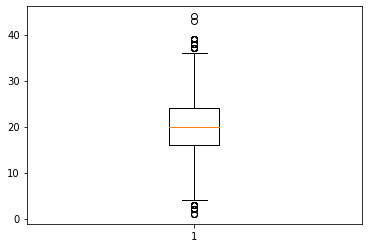

In [26]:
plt.boxplot(df['Hours_Studied'])

{'whiskers': [<matplotlib.lines.Line2D at 0x203cb4eb6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x203cb4ebdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x203cb4eb310>],
 'medians': [<matplotlib.lines.Line2D at 0x203cb13a520>],
 'fliers': [<matplotlib.lines.Line2D at 0x203cb13a8b0>],
 'means': []}

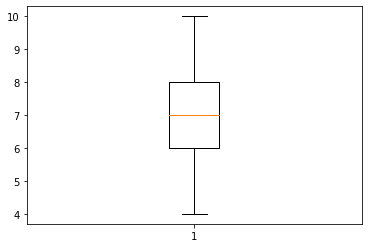

In [27]:
plt.boxplot(df['Sleep_Hours'])

In [28]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64